<a href="https://colab.research.google.com/github/himanshuarora1703/Tutorial-notebooks/blob/main/Vanishing%20Gradient%20Problem/Vanishing_gradient_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.datasets import make_moons

In [6]:
X,y = make_moons(n_samples=500,noise=0.02,random_state=20)

In [8]:
y[0:5]

array([1, 0, 0, 1, 1])

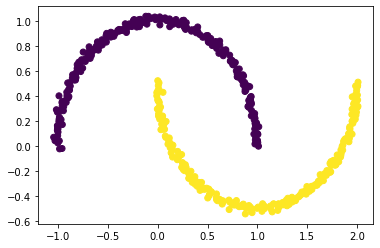

In [10]:
# plot the data

plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [12]:
# build the model

model = Sequential()
model.add(Dense(20,activation='sigmoid',input_dim=2))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                4

In [15]:
old_weights = model.get_weights()[0]
old_weights

array([[-0.41213295,  0.41856492,  0.2492091 ,  0.18031245,  0.16222823,
        -0.46181172,  0.16094291,  0.50307256,  0.45608908, -0.49770123,
        -0.31076983, -0.11584637,  0.19419271, -0.4835112 ,  0.05053151,
         0.3319612 , -0.05810162,  0.15801346, -0.06484222,  0.06068659],
       [ 0.03134912,  0.03430063, -0.0269939 ,  0.3152451 , -0.43069816,
         0.42921048, -0.22269055, -0.14581159,  0.31352073, -0.30686158,
        -0.39391065,  0.03971422,  0.47888833,  0.39253247, -0.09321979,
         0.2407723 , -0.08523148,  0.29288995,  0.25418627, -0.2976339 ]],
      dtype=float32)

In [16]:
# fit the model

history = model.fit(X_train,y_train,epochs=200)

Epoch 1/200
13/13 [==============================] - 3s 3ms/step - loss: 1.0055 - accuracy: 0.4800
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8714 - accuracy: 0.4800
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 0.7893 - accuracy: 0.4800
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 0.7379 - accuracy: 0.4800
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 0.7114 - accuracy: 0.4800
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.4800
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4800
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5200
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5200
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5200
Epoch 11/

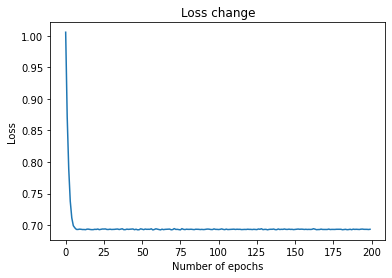

In [18]:
# plot the loss graph

plt.plot(history.history['loss'])
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Loss change')
plt.show()

The Loss is constantly stuck around 0.7 and does not decrease at all.

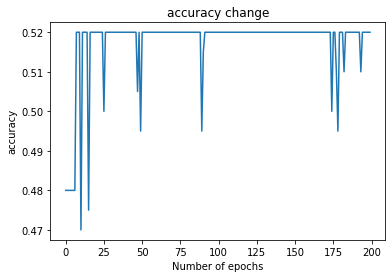

In [19]:
# plot the accuracy graph

plt.plot(history.history['accuracy'])
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')
plt.title('accuracy change')
plt.show()

The accuracy is also stuck around the 0.52 value and does not increase at all

In [20]:
new_weights = model.get_weights()[0]

In [34]:
# get the learning rate value for the model

lr = model.optimizer.learning_rate.numpy()

In [35]:
# calculate the gradients

gradients = (old_weights - new_weights) / lr

gradients

array([[-0.19124149,  0.87156886,  0.10830163,  0.8835345 , -0.90971583,
        -0.6516873 ,  0.787124  , -0.12660027, -1.3008415 , -0.02145767,
         0.66471094,  0.54552406, -0.3249496 ,  0.1785159 , -1.7610862 ,
        -0.2784133 , -0.52901727,  1.0118037 , -0.622876  ,  0.2944693 ],
       [ 0.15539117, -0.6894804 , -0.08622929, -0.6408393 ,  0.6680786 ,
         0.51787496, -0.5569756 ,  0.07525086,  1.0142028 ,  0.020504  ,
        -0.50362945, -0.38341057,  0.23773311, -0.14257431,  1.2610033 ,
         0.19185244,  0.38827953, -0.73024625,  0.4278123 , -0.21725892]],
      dtype=float32)

In [36]:
# percentage change of weights

per_change = abs((new_weights - old_weights) / old_weights) * 100

per_change

array([[0.04640287, 0.2082279 , 0.04345814, 0.49000198, 0.560763  ,
        0.14111538, 0.48907033, 0.02516541, 0.28521657, 0.00431136,
        0.21389173, 0.47090304, 0.16733359, 0.03692074, 3.4851253 ,
        0.08386923, 0.9105034 , 0.6403276 , 0.9606024 , 0.48522964],
       [0.4956795 , 2.0101104 , 0.31943992, 0.2032829 , 0.15511528,
        0.12065758, 0.2501119 , 0.05160829, 0.3234883 , 0.00668184,
        0.12785374, 0.96542406, 0.0496427 , 0.03632166, 1.3527206 ,
        0.07968211, 0.45555887, 0.24932446, 0.16830662, 0.07299536]],
      dtype=float32)

The percentage change in the value of weights even running the model for 200 epochs is very less and seems that the weights have not been updated at all.    
This all results due to the **Vanishing Gradient problem** which does not allow the weight updation to properly take place and also does not allow the model to minimize its loss.